In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [19]:
#Importar datos
ds = pd.read_csv('../../datasets/wbes_sintetico.csv')
ds.head()

,employees,firm_age_years,training,access_finance,exporter,digital_payments,competition_level,sector,sales_annual_usd,labor_productivity_usd_per_employee,successful
0,13.0,10.0,1.0,1.0,0,1,Media,Manufactura,42879.327130,5374.714150,1
1,9.0,6.0,0.0,0.0,0,1,Baja,Servicios,54570.897174,4728.282631,0
2,15.0,10.0,0.0,0.0,1,1,Baja,Servicios,56311.260030,3104.627628,0
3,25.0,12.0,1.0,0.0,1,1,Baja,Servicios,93419.359675,3129.017055,1
4,9.0,9.0,0.0,0.0,0,0,Baja,Manufactura,24608.889361,2824.645056,1


**Limpieza de datos**

In [20]:
#Datos nulos
ds.isna().sum()

employees                              10
firm_age_years                         26
training                               33
access_finance                         35
exporter                                0
digital_payments                        0
competition_level                      33
sector                                 13
sales_annual_usd                       27
labor_productivity_usd_per_employee     0
successful                              0
dtype: int64

In [21]:
#Selección de columnas y eliminación de datos nulos
columns_of_interest = [
    'sales_annual_usd', 
    'labor_productivity_usd_per_employee', 
    'employees', 
    'firm_age_years', 
    'access_finance', 
    'training', 
    'competition_level', 
    'exporter'
]

# Dataframe
df_clean = ds[columns_of_interest].copy()

# Eliminamos las filas con nulos
df_clean.dropna(inplace=True)

print(f"Registros originales: {len(ds)}")
print(f"Registros después de limpiar: {len(df_clean)}")

Registros originales: 1200
Registros después de limpiar: 1046


In [22]:
#Datos nulos
df_clean.isna().sum()

sales_annual_usd                       0
labor_productivity_usd_per_employee    0
employees                              0
firm_age_years                         0
access_finance                         0
training                               0
competition_level                      0
exporter                               0
dtype: int64

**Regresión lineal simple**

In [23]:
# Definir variables
X_simple = df_clean[['employees']].values
y_simple = df_clean['sales_annual_usd'].values.reshape(-1, 1)

In [24]:
# Entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_simple, y_simple, test_size=0.3, random_state=0)

In [25]:
#Entrenar modelo
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, Y_train)
y_pred = modelo_lineal.predict(X_train)

In [26]:
# Predicciones
y_pred = modelo_lineal.predict(X_test)

In [29]:
# Metricas
print('Coeficients: \n', modelo_lineal.coef_)
print('Independent term: \n', modelo_lineal.intercept_)

print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_pred))
print("Score en Test: %.4f" % modelo_lineal.score(X_test, Y_test))
print('Variance score: %.2f' % r2_score(Y_test, y_pred))

Coeficients: 
 [[1130.74785956]]
Independent term: 
 [16073.22218439]
Mean squared error: 183236320.82
Score en Test: 0.2990
Variance score: 0.30


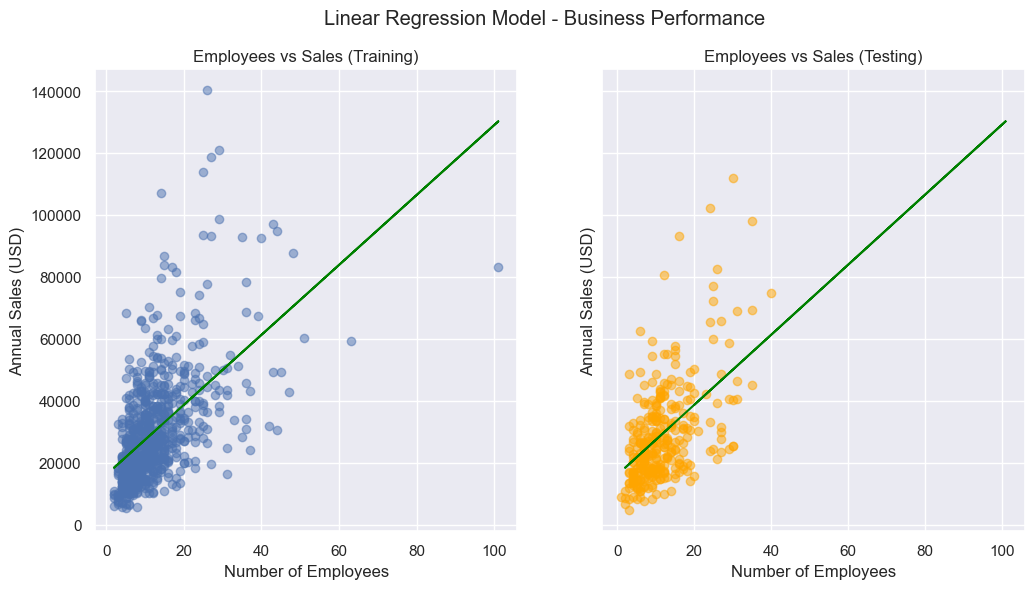

In [34]:
sns.set_theme()
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Gráfica de Entrenamiento
ax[0].scatter(X_train, Y_train, alpha=0.5)
ax[0].plot(X_train, regressor.predict(X_train), color='green')
ax[0].set_title('Employees vs Sales (Training)')
ax[0].set_xlabel('Number of Employees')
ax[0].set_ylabel('Annual Sales (USD)')

# Gráfica de Test
ax[1].scatter(X_test, Y_test, alpha=0.5, color='orange')
ax[1].plot(X_train, regressor.predict(X_train), color='green') # Línea del modelo
ax[1].set_title('Employees vs Sales (Testing)')
ax[1].set_xlabel('Number of Employees')
ax[1].set_ylabel('Annual Sales (USD)')

plt.suptitle('Linear Regression Model - Business Performance')
plt.show()